# Bandwidth Control

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pickle
import os
import re

In [9]:
print("="*80)
print("Bandwidth Control")
print("-"*80)

Bandwidth Control
--------------------------------------------------------------------------------


In [10]:
# ensure figures dir exists
os.makedirs('figures', exist_ok=True)

In [11]:
def get_execution_duration_by_equation(cpu_time, cgroup_quota, cgroup_period):
    if cpu_time < cgroup_quota:
        return cpu_time
    execution_duration = 0
    leftover = cpu_time % cgroup_quota
    if leftover != 0:
        execution_duration += cpu_time // cgroup_quota * cgroup_period + leftover
    else:
        execution_duration += (cpu_time // cgroup_quota - 1) * cgroup_period + cgroup_quota
    return execution_duration

In [12]:
def get_execution_duration_by_fraction(cpu_time, vCPUs):
    return cpu_time / vCPUs

Figure saved to 'figures/bandwidth_control_32.1ms.pdf'


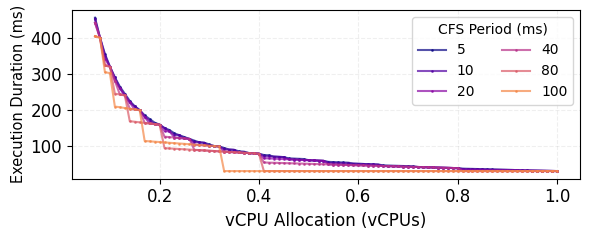

In [13]:
cpu_time = 32.1
fig, ax = plt.subplots(figsize=(6, 2.5))

colors = plt.cm.plasma(np.linspace(0, 1, 8))
color_index = 0
for cgroup_period in [5, 10, 20, 40, 80, 100]:
    execution_durations = []
    for cpu_limit in range(70, 1010, 10):
        cgroup_quota = cgroup_period * cpu_limit / 1000
        execution_duration = get_execution_duration_by_equation(cpu_time, cgroup_quota, cgroup_period)
        execution_durations.append(execution_duration)
    ax.plot([x/1000 for x in range(70, 1010, 10)], execution_durations, label=f'{cgroup_period}', marker='o', markersize=1, alpha=0.7, color=colors[color_index])
    color_index += 1


ax.tick_params(axis='both', which='major', labelsize=12)

plt.xlabel('vCPU Allocation (vCPUs)', fontsize=12)
plt.ylabel('Execution Duration (ms)', fontsize=10.5)
plt.grid(alpha=0.2, linestyle='--')
ax.grid(which='minor', alpha=0.2, linestyle='--')
plt.legend(ncol=2, title='CFS Period (ms)')
plt.tight_layout()

fig.savefig(f'figures/bandwidth_control_32.1ms.pdf')
print("Figure saved to 'figures/bandwidth_control_32.1ms.pdf'")


Figure saved to 'figures/bandwidth_control_51.8ms.pdf'


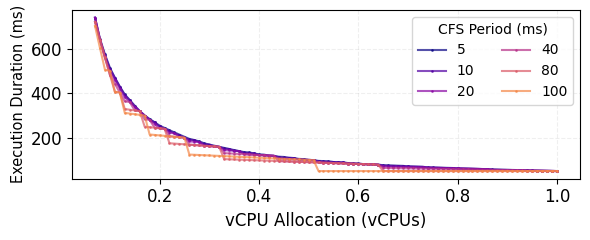

In [14]:
cpu_time = 51.8
fig, ax = plt.subplots(figsize=(6, 2.5))

colors = plt.cm.plasma(np.linspace(0, 1, 8))
color_index = 0
for cgroup_period in [5, 10, 20, 40, 80, 100]:
    execution_durations = []
    for cpu_limit in range(70, 1010, 10):
        cgroup_quota = cgroup_period * cpu_limit / 1000
        execution_duration = get_execution_duration_by_equation(cpu_time, cgroup_quota, cgroup_period)
        execution_durations.append(execution_duration)
    ax.plot([x/1000 for x in range(70, 1010, 10)], execution_durations, label=f'{cgroup_period}', marker='o', markersize=1, alpha=0.7, color=colors[color_index])
    color_index += 1


ax.tick_params(axis='both', which='major', labelsize=12)

plt.xlabel('vCPU Allocation (vCPUs)', fontsize=12)
plt.ylabel('Execution Duration (ms)', fontsize=10.5)
plt.grid(alpha=0.2, linestyle='--')
ax.grid(which='minor', alpha=0.2, linestyle='--')
plt.legend(ncol=2, title='CFS Period (ms)')
plt.tight_layout()

fig.savefig(f'figures/bandwidth_control_51.8ms.pdf')
print("Figure saved to 'figures/bandwidth_control_51.8ms.pdf'")
